Importing important Libraries

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re

Reading the data

In [143]:
Data = pd.read_csv("drug.csv")

In [144]:
Data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [145]:
# check for Rows and columns in the dataset
Data.shape

(161297, 7)

In [146]:
# check for duplicate entries
Data.duplicated().sum()

0

In [147]:
# Getting attributes along with their datatype
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     161297 non-null  int64 
 1   drugName     161297 non-null  object
 2   condition    160398 non-null  object
 3   review       161297 non-null  object
 4   rating       161297 non-null  int64 
 5   date         161297 non-null  object
 6   usefulCount  161297 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 8.6+ MB


In [148]:
# Converting Attribute Date into format Datatype format
Data['date'] = pd.to_datetime(Data['date'] )

EDA:

In [149]:
Data['drugName'].nunique()

3436

In [150]:
# Total number of unique DrugName
print('Total number of unique DrugName:',Data['drugName'].nunique())
print("----------------------------")
# lets check the Number and Name of the Drugs with 0 Useful Count in Details

print("Analysis on Useless Drugs")
print("----------------------------")
print("The Number of Drugs with No Useful Count :", Data[Data['usefulCount'] == 0].count()[0])

# Lets Check the Number of Drugs with No Usesful Count with Review Greater than or Equal to 8
print("Number of Good Drugs with Lesser Useful Count :", Data[(Data['usefulCount'] == 0) &
                                                Data['rating'] >= 8].count()[0])

# Lets Check the Average Rating of the Drugs with No Useful Count
print("Average Rating of Drugs with No Useful Count : {0:.2f}".format(Data[Data['usefulCount'] == 0]['rating'].mean()))

print("\nAnalysis on Useful Drugs")
print("----------------------------")
print("The Number of Drugs with Greater than 1000 Useful Counts :", Data[Data['usefulCount'] > 1000].count()[0])
print("Average Rating of Drugs with 1000+ Useful Counts :", Data[Data['usefulCount'] > 1000]['rating'].mean())
print("\nName and Condition of these Drugs: \n\n", 
    Data[Data['usefulCount'] > 1000][['drugName','condition']].reset_index(drop = True))

Total number of unique DrugName: 3436
----------------------------
Analysis on Useless Drugs
----------------------------
The Number of Drugs with No Useful Count : 6318
Number of Good Drugs with Lesser Useful Count : 0
Average Rating of Drugs with No Useful Count : 5.80

Analysis on Useful Drugs
----------------------------
The Number of Drugs with Greater than 1000 Useful Counts : 4
Average Rating of Drugs with 1000+ Useful Counts : 10.0

Name and Condition of these Drugs: 

          drugName      condition
0          Mirena  Birth Control
1      Sertraline     Depression
2  Levonorgestrel  Birth Control
3          Zoloft     Depression


In [151]:
# Separating Categorical Columns and Numerical Columns
Numerical = Data.select_dtypes(['int64'])
Categorical = Data.select_dtypes(['object'])

In [152]:
# Summarizing Categorical Features
Categorical.describe()

,drugName,condition,review
count,161297,160398,161297
unique,3436,884,112329
top,Levonorgestrel,Birth Control,"""Good"""
freq,3657,28788,33


In [153]:
# Summarizing Numerical Features
Numerical.describe()

,uniqueID,rating,usefulCount
count,161297.000000,161297.000000,161297.000000
mean,115923.585305,6.994377,28.004755
std,67004.445170,3.272329,36.403742
min,2.000000,1.000000,0.000000
25%,58063.000000,5.000000,6.000000
50%,115744.000000,8.000000,16.000000
75%,173776.000000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


uniqueID
0.005850781159396161


c:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


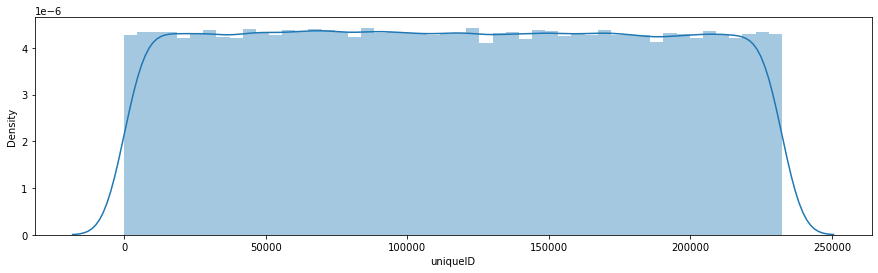

rating
-0.7986194576446942


c:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


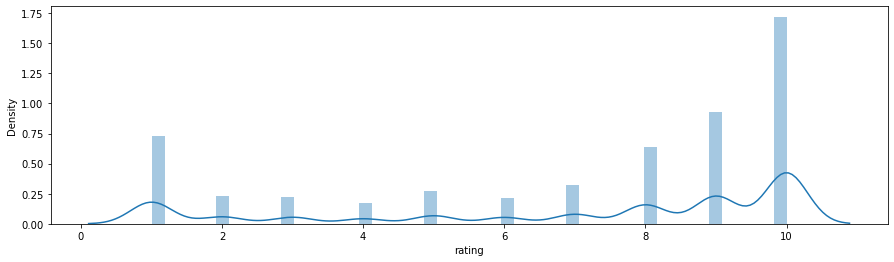

usefulCount
4.666650755782709


c:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


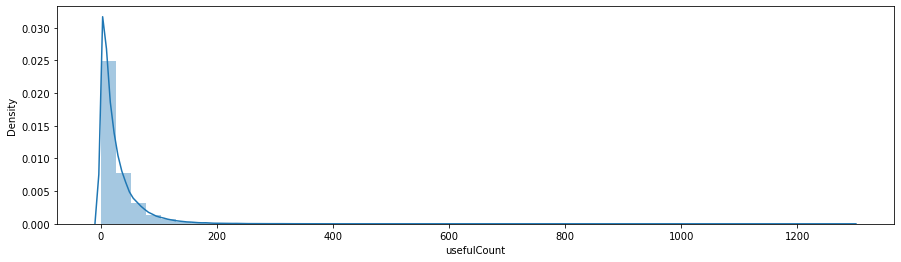

In [154]:
from scipy.stats import skew
for col in Numerical.columns:
    print(col)
    print(skew(Data[col]))
    plt.figure()
    sns.distplot(Data[col])
    plt.show()

c:\Users\shubh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


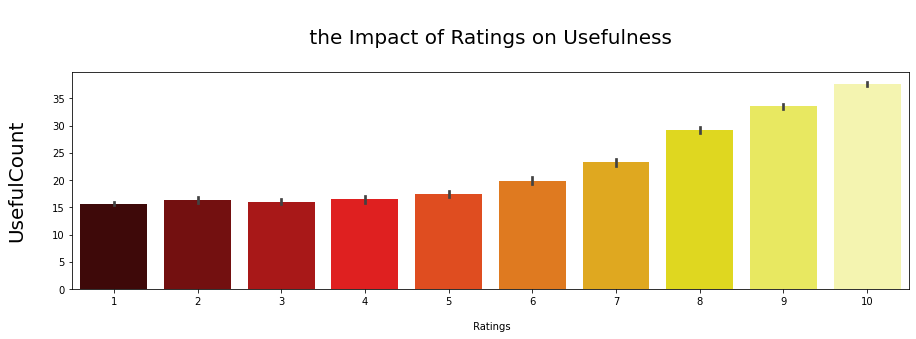

In [155]:
# lets check the Impact of Ratings on Usefulness
plt.rcParams['figure.figsize'] = (15, 4)
sns.barplot(Data['rating'], Data['usefulCount'], palette = 'hot')
plt.xlabel('\n Ratings')
plt.ylabel('UsefulCount\n', fontsize = 20)
plt.title('\n the Impact of Ratings on Usefulness \n', fontsize = 20)
plt.show()


In [156]:
# Check for missing values
Data.isnull().sum()

uniqueID         0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [157]:
# Missing value treatment
Data.dropna(inplace=True)
Data.isnull().sum()

uniqueID       0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64

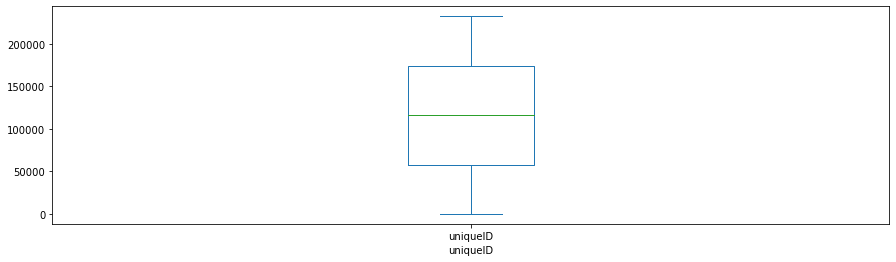

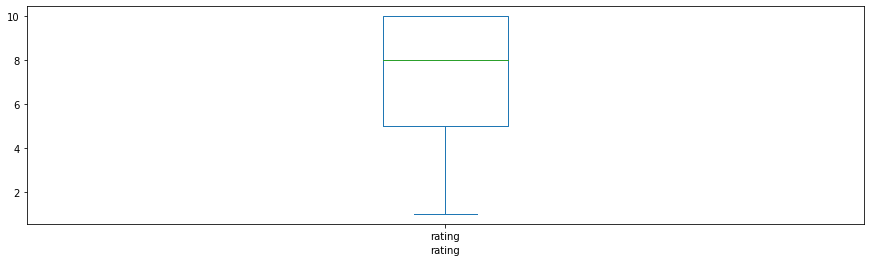

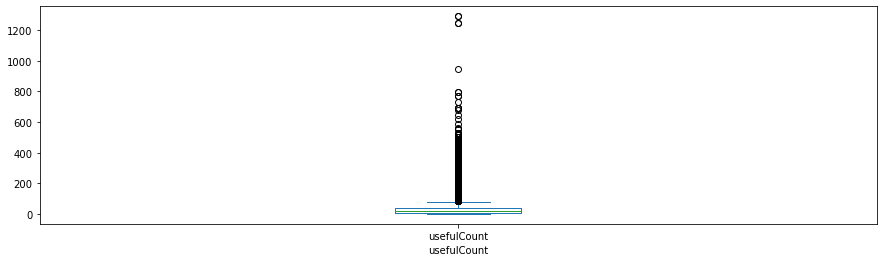

In [158]:
# box plot to detect outlier in dataset
for i in Numerical.columns:
    Data[i].plot.box()
    plt.xlabel(str(i))
    plt.show()

In [159]:
# This UDF is used to remove outlier but here Usefulcount is natural outlier so we should not removed it
#outlier treatment
#def outlier_var(x):
    #if ((x.dtype=="float") or (x.dtype == "int64")):
        #q1 = x.quantile(0.25)
       # q3 = x.quantile(0.75)
       # iqr = q3 - q1
        #lc = q1 - 1.5 * iqr
       # uc = q3 + 1.5 * iqr
       # x = x.clip(lower = lc, upper = uc)
    #else:
       # x
    #return x\

Cleaning review part

In [160]:
# remove punctuations
#Data.replace("[^a-zA-Z]"," ",regex=True,inplace=True)

# First lets remove Punctuations from the Reviews
def punctuation_removal(messy_str):
    clean_list = [char for char in messy_str if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

Data['review'] = Data['review'].apply(punctuation_removal)

In [161]:
# Now lets Remove the Stopwords also

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop = stopwords.words('english')
stop.append("i'm")

stop_words = []

for item in stop: 
    new_item = punctuation_removal(item)
    stop_words.append(new_item) 

def stopwords_removal(string):
    string = word_tokenize(string)
    return [word.lower() for word in string 
            if word.lower() not in stop_words ]

Data['review'] = Data['review'].apply(stopwords_removal)

In [162]:
# lets remove the Numbers also

import re
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ' '.join(list_text_new)

Data['review'] = Data['review'].apply(drop_numbers)

In [163]:
# for using Sentiment Analyzer we will have to dowload the Vader Lexicon from NLTK

import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\shubh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [164]:
# lets calculate the Sentiment from Reviews

from nltk.sentiment.vader import SentimentIntensityAnalyzer
SentimentAnalyzer = SentimentIntensityAnalyzer()

train_sentiments = []

for i in Data['review']:
    train_sentiments.append(SentimentAnalyzer.polarity_scores(i).get('compound'))
    
train_sentiments = np.asarray(train_sentiments)
Data['sentiment'] = pd.Series(data=train_sentiments)

In [165]:
# check Impact of Sentiment on Reviews
Data[['rating','sentiment']].groupby(['rating']).agg(['min','mean','max'])

sentiment                  
             min      mean     max
rating                            
1        -0.9931  0.005311  0.9898
2        -0.9929  0.003867  0.9924
3        -0.9925  0.003170  0.9877
4        -0.9919  0.000697  0.9867
5        -0.9920  0.014445  0.9882
6        -0.9914  0.008838  0.9936
7        -0.9938 -0.000509  0.9911
8        -0.9936  0.008952  0.9923
9        -0.9964  0.009489  0.9911
10       -0.9982  0.005446  0.9923

In [166]:
# as we can see that Sentiment and length of the review are not related to Reviews, we will drop the sentiment column

# lets remove the unique Id, date, review, len, and sentiment column also
Data = Data.drop(['date','uniqueID','sentiment','review'], axis = 1)

# lets check the name of columns now
Data.columns

Index(['drugName', 'condition', 'rating', 'usefulCount'], dtype='object')

In [167]:
Data['rating'].describe()

count    160398.000000
mean          6.995923
std           3.272303
min           1.000000
25%           5.000000
50%           8.000000
75%          10.000000
max          10.000000
Name: rating, dtype: float64

In [168]:
# Lets Calculate an Effective Rating
# Data['eff_score'] = np.where(Data['rating'] > 5,1,0)

min_rating = Data['rating'].min()
max_rating = Data['rating'].max()

def scale_rating(rating):
    rating -= min_rating
    rating = rating/(max_rating -1)
    rating *= 5
    rating = int(round(rating,0))
    
    if(int(rating) == 0 or int(rating)==1 or int(rating)==2):
        return 0
    else:
        return 1
    
Data['eff_score'] = Data['rating'].apply(scale_rating)

In [169]:
Data.head(10)

,drugName,condition,rating,usefulCount,eff_score
0,Valsartan,Left Ventricular Dysfunction,9,27,1
1,Guanfacine,ADHD,8,192,1
2,Lybrel,Birth Control,5,17,0
3,Ortho Evra,Birth Control,8,10,1
4,Buprenorphine / naloxone,Opiate Dependence,9,37,1
5,Cialis,Benign Prostatic Hyperplasia,2,43,0
6,Levonorgestrel,Emergency Contraception,1,5,0
7,Aripiprazole,Bipolar Disorde,10,32,1
8,Keppra,Epilepsy,1,11,0
9,Ethinyl estradiol / levonorgestrel,Birth Control,8,1,1


In [170]:
Data['usefulCount'].describe()

count    160398.000000
mean         28.097613
std          36.457876
min           0.000000
25%           6.000000
50%          16.000000
75%          36.000000
max        1291.000000
Name: usefulCount, dtype: float64

In [171]:
# lets also calculate Usefulness Score

Data['usefulness'] = Data['rating']*Data['usefulCount']*Data['eff_score']
Data

,drugName,condition,rating,usefulCount,eff_score,usefulness
0,Valsartan,Left Ventricular Dysfunction,9,27,1,243
1,Guanfacine,ADHD,8,192,1,1536
2,Lybrel,Birth Control,5,17,0,0
3,Ortho Evra,Birth Control,8,10,1,80
4,Buprenorphine / naloxone,Opiate Dependence,9,37,1,333
...,...,...,...,...,...,...
161292,Campral,Alcohol Dependence,10,125,1,1250
161293,Metoclopramide,Nausea/Vomiting,1,34,0,0
161294,Orencia,Rheumatoid Arthritis,2,35,0,0
161295,Thyroid desiccated,Underactive Thyroid,10,79,1,790


In [172]:
Data['usefulness'].describe()

count    160398.000000
mean        212.649827
std         347.677211
min           0.000000
25%           0.000000
50%          81.000000
75%         280.000000
max       12910.000000
Name: usefulness, dtype: float64

In [188]:
# lets check the Top 10 Most Useful Drugs with their Respective Conditions, ratings, usefulCount, eff_score	
Data.sort_values(by = 'usefulness',ascending = False).head(10).reset_index(drop = True)

,drugName,condition,rating,usefulCount,eff_score,usefulness
0,Sertraline,Depression,10,1291,1,12910
1,Zoloft,Depression,10,1291,1,12910
2,Mirena,Birth Control,10,1247,1,12470
3,Levonorgestrel,Birth Control,10,1247,1,12470
4,Zoloft,Depression,9,949,1,8541
5,Adipex-P,Weight Loss,10,796,1,7960
6,Phentermine,Weight Loss,10,796,1,7960
7,Implanon,Birth Control,10,730,1,7300
8,Viibryd,Depression,10,693,1,6930
9,Vilazodone,Depression,10,693,1,6930


### Analyzing the Medical Condtitions

In [189]:
# lets calculate the Number of Useless and Useful Drugs for Each Condition
import ipywidgets
from ipywidgets import interact
@interact
def check(condition = list(Data['condition'].value_counts().index)):
    return Data[Data['condition'] == condition]['eff_score'].value_counts()

interactive(children=(Dropdown(description='condition', options=('Birth Control', 'Depression', 'Pain', 'Anxie…

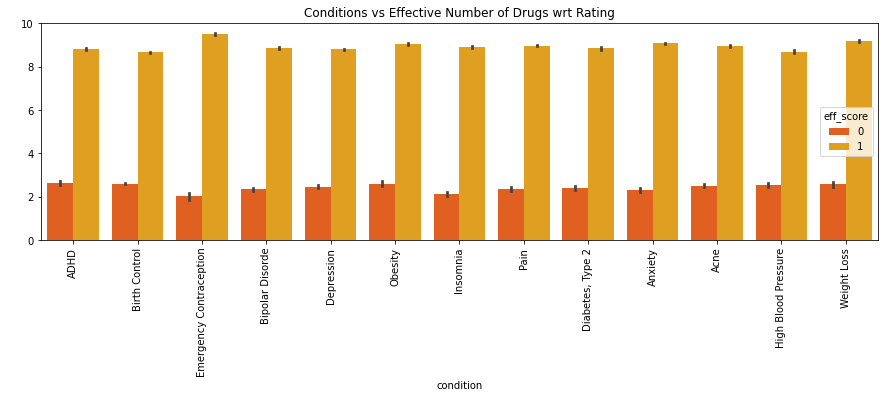

In [192]:
# lets check this in Graph, 

sample_conditions = ('Birth Control','Depression','Pain','Anxiety','Acne','Bipolar Disorde','Insomnia','Weight Loss',
                      'Obesity','ADHD', 'Diabetes, Type 2', 'Emergency Contraception', 'High Blood Pressure','Migrane')
conditions = Data.loc[Data['condition'].isin(sample_conditions)]

sns.barplot(x = conditions['condition'], y = conditions['rating'], hue = Data['eff_score'], 
     palette = 'autumn')
plt.title('Conditions vs Effective Number of Drugs wrt Rating')
plt.xticks(rotation = 90)
plt.ylabel(' ')
plt.show()

In [193]:
# lets check the Most Common Conditions

print("Number of Unique Conditions :", Data['condition'].nunique())
Data['condition'].value_counts().head(10)

Number of Unique Conditions : 884


Birth Control      28788
Depression          9069
Pain                6145
Anxiety             5904
Acne                5588
Bipolar Disorde     4224
Insomnia            3673
Weight Loss         3609
Obesity             3568
ADHD                3383
Name: condition, dtype: int64

In [206]:
# lets check Drugs, which were useful to Highest Number of Poeple
Data[['drugName','usefulCount']].sort_values(by = 'usefulCount',ascending = False).head(10).reset_index(drop = True)

,drugName,usefulCount
0,Zoloft,1291
1,Sertraline,1291
2,Levonorgestrel,1247
3,Mirena,1247
4,Zoloft,949
5,Phentermine,796
6,Adipex-P,796
7,Celexa,771
8,Citalopram,771
9,Implanon,730


In [209]:
# lets remove all the Duplicates from the Dataset
Data = Data.drop_duplicates()

### Finding Most Useful and Useless Drugs for each Condition

In [210]:
@interact
def high_low_rate(condition = list(Data['condition'].value_counts().index)):
    print("\n Top 5 Drugs")
    print(Data[Data['condition'] == condition][['drugName','usefulness']].sort_values(by = 'usefulness',
                                                 ascending = False).head().reset_index(drop = True))
    print("\n\n Bottom 5 Drugs")
    print(Data[Data['condition'] == condition][['drugName','usefulness']].sort_values(by = 'usefulness',
                                                 ascending = True).head().reset_index(drop = True))

interactive(children=(Dropdown(description='condition', options=('Birth Control', 'Depression', 'Pain', 'Anxie…